<a href="https://colab.research.google.com/github/antoniomuso/speech2face/blob/master/Decoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip3 install face_recognition
import numpy as np
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, models, transforms
from PIL import Image
import face_recognition

PATH = "http://www.robots.ox.ac.uk/~albanie/models/pytorch-mcn/vgg_face_dag.pth"

     |████████████████████████████████| 100.2MB 117kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=4a7f3402d26c7dbe153a48bf36470d269e6b50968b3cf4731bec4bcb9a7a9073
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Download Dataset
# Test Set
# ! wget -x --load-cookies "/content/drive/My Drive/Speech2Face/cookies.txt" -O "/content/drive/My Drive/Speech2Face/vggface2_test.tar.gz" http://zeus.robots.ox.ac.uk/vgg_face2/get_file?fname=vggface2_test.tar.gz

#! tar -zxvf "/content/drive/My Drive/Speech2Face/vggface2_test.tar.gz" -C "/content/drive/My Drive/Speech2Face/data_test"
# Training Set 
# ! wget -x --load-cookies "/content/drive/My Drive/Speech2Face/cookies.txt" -O "/content/drive/My Drive/Speech2Face/vggface2_test.tar.gz" http://zeus.robots.ox.ac.uk/vgg_face2/get_file?fname=vggface2_test.tar.gz

[(82, 182, 211, 53)]


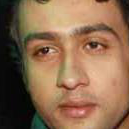

In [14]:
img = face_recognition.load_image_file("/content/drive/My Drive/Speech2Face/data_test/test/n000078/0002_02.jpg")
faceLoc = face_recognition.face_locations(img)

x,y1,x1,y = faceLoc[0]
img = img[x:x1,y:y1]
Image.fromarray(img)


In [ ]:
# Initialize vgg with 11 layers
vgg = models.vgg16_bn(pretrained=True, progress=True)

# We remove the last 2 layers of classifier to have 4096-D features vector
new_classifier = nn.Sequential(*list(vgg.classifier.children())[:-2])
vgg.classifier = new_classifier
vgg.cuda()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [ ]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(cup)
input_batch = input_tensor.unsqueeze(0).to("cuda")


In [ ]:
vgg.train(False)
vgg(input_batch)


tensor([[0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0',
       grad_fn=<ReluBackward1>)